<a href="https://colab.research.google.com/github/Pv01energ/pv01/blob/main/%22Coursera_(Dota)_PavlovP_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Финальное задание

Предметная область: 
Игра Dota 2

Dota 2 — многопользовательская компьютерная игра жанра MOBA.

Игроки играют между собой матчи. В каждом матче участвует две команды (5 человек в каждой). Одна команда играет за светлую сторону (The Radiant), другая — за тёмную (The Dire).

Цель каждой команды — уничтожить главное здание базы противника (трон).

Ссылка на  (описание) final-statement (HTML): https://d3c33hcgiwev3.cloudfront.net/_241f17ef513f517fb19931139a6be20a_final-statement.html?Expires=1674000000&Signature=jMOZm-bSR0QfIrWMfO75ZOuiWhXtJ2J9Nu78Kzyaqj-Ro2iYMQ~blVTyLdmG-3f4k5CriaA9V6wRX1XiwlTUJ~uTz9zT1tDi0hWTWoUoUrchCLvGEPo43JX3r5-gaFQ7OEBMzDjd2X14o0bY4BSwdh2bYUXQjAvftz6AISHWAW4_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A


Необходимый (для исследования) набор данных (можно скачать) по ссылке (на задание): https://www.coursera.org/learn/vvedenie-mashinnoe-obuchenie/peer/J1SH8/proiekt-priedskazaniia-pobieditielia-v-onlain-ighrie


# Загрузка и предобработка данных

In [6]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import datetime as dt 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler


In [ ]:
# загружаем датасеты (data)
from google.colab import files 
uploaded = files.upload()
dt = pd.read_csv('features.csv')
 

Saving features.csv to features.csv


In [ ]:
from google.colab import files 
uploaded = files.upload()
dt = pd.read_csv('features_test.csv')

Saving features_test.csv to features_test.csv


In [7]:
# from google.colab import files 
# uploaded = files.upload()
# dt = pd.read_bz2.BZ2File('matches.jsonlines')

In [9]:
# from google.colab import files 
# uploaded = files.upload()
# dt = pd.read_bz2.BZ2File('matches_test.jsonlines')

In [68]:
# Обработка матча
import json
import bz2

# with bz2.BZ2File('matches.jsonlines') as matches_file:
    # for line in matches_file:
        # match = json.loads(line)
        
        # break

In [11]:
# проверяем загрузку датасета features
features = pd.read_csv('features.csv', index_col='match_id')
features.head()


,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,4,2,2,-52.0,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,4,3,1,-5.0,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,4,3,1,13.0,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,4,2,0,27.0,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,3,3,0,-16.0,2449,0,4,1974,3,63


In [12]:
# удаляем ненужные столбцы
del_names = list(features.columns[102:])
cleaned_features = features.drop(columns=del_names)


In [13]:
# проверяем
cleaned_features

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,0,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,0,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,1,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,0,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,0,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114402,1450265551,1,47,4,1706,1198,17,0,1,8,...,0,-29.0,180.0,-76.0,180.0,3,4,3,0,-24.0
114403,1450277704,0,43,4,1793,1416,17,0,1,5,...,0,-5.0,NaN,-82.0,NaN,4,3,2,0,-17.0
114404,1450291848,1,98,4,1399,540,1,0,0,5,...,2,-32.0,249.0,-70.0,NaN,1,1,3,1,-15.0


In [14]:
# выводим необходимые признаки
print(cleaned_features.shape)
cleaned_features.columns[cleaned_features.isna().any()]


(97230, 102)


Index(['first_blood_time', 'first_blood_team', 'first_blood_player1',
       'first_blood_player2', 'radiant_bottle_time', 'radiant_courier_time',
       'radiant_flying_courier_time', 'radiant_first_ward_time',
       'dire_bottle_time', 'dire_courier_time', 'dire_flying_courier_time',
       'dire_first_ward_time'],
      dtype='object')

In [15]:
cleaned_features.fillna(0, inplace=True)

In [16]:
# определяем  целевую переменную
y = features["radiant_win"]
y.shape


(97230,)

# Градиентный Бустинг

In [17]:
# определяем время(интервал), для метода Градиентного Бустинга (с n_estim = 30)
import datetime
start_time = datetime.datetime.now()
estimator = GradientBoostingClassifier(n_estimators = 30, random_state=241)
cv = KFold(n_splits=5, shuffle=True, random_state=241)
scores : np.ndarray = cross_val_score(estimator, cleaned_features, y, cv=cv, scoring='roc_auc', n_jobs=6)
print('Time elapsed: ', datetime.datetime.now() - start_time)


Time elapsed: 0:02:30.639394


In [18]:
np.mean(scores)

0.6894962060591201

In [21]:
# обучаем модель GBClassifier (random_state=241)
estimator = GradientBoostingClassifier(random_state=241)
grid = {'n_estimators': [10,20,30,50,100,250]}
cv = KFold(n_splits=5, shuffle=True, random_state=241)
gs = GridSearchCV(estimator, grid, scoring='roc_auc', cv=cv, n_jobs=5, verbose=2)
gs.fit(cleaned_features, y)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=241, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=241), n_jobs=5,
             param_grid={'n_estimators': [10, 20, 30, 50, 100, 250]},
             scoring='roc_auc', verbose=2)

In [22]:
# строим auc_roc кривую
print(gs.refit_time_)
gs.cv_results_


325.19421434402466


{'mean_fit_time': array([ 39.85624986,  77.85011859, 117.73983698, 197.29430599,
        392.91358585, 976.48233552]),
 'std_fit_time': array([0.61539218, 1.08602701, 0.85608684, 0.8974322 , 3.34859684,
        2.64034179]),
 'mean_score_time': array([0.1316608 , 0.17105937, 0.22570677, 0.2430716 , 0.36796727,
        0.43587904]),
 'std_score_time': array([0.02188316, 0.01711056, 0.0352136 , 0.03489277, 0.04392459,
        0.25219266]),
 'param_n_estimators': masked_array(data=[10, 20, 30, 50, 100, 250],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 10},
  {'n_estimators': 20},
  {'n_estimators': 30},
  {'n_estimators': 50},
  {'n_estimators': 100},
  {'n_estimators': 250}],
 'split0_test_score': array([0.66943496, 0.68939011, 0.69641668, 0.70382382, 0.71211028,
        0.72079812]),
 'split1_test_score': array([0.65627754, 0.67567277, 0.68365441, 0.69325852, 0.70275727,
        0.7123684

In [23]:
# pickle (время обучения (для 250 деревьев) большое, поэтому сохраняем результаты)
import pickle
with open("GridSearchCVRes.pke", "wb") as file:
    pickle.dump(gs.cv_results_, file)


In [33]:
import pickle
with open("GridSearchCVRes.pke", "rb") as file:
  gs_gbc = pickle.load(file)    
print(gs_gbc)
gs_gbc

# ~0.71...лучший результат бустинга (при условии адекватного времени обучения)

{'mean_fit_time': array([ 39.85624986,  77.85011859, 117.73983698, 197.29430599,
       392.91358585, 976.48233552]), 'std_fit_time': array([0.61539218, 1.08602701, 0.85608684, 0.8974322 , 3.34859684,
       2.64034179]), 'mean_score_time': array([0.1316608 , 0.17105937, 0.22570677, 0.2430716 , 0.36796727,
       0.43587904]), 'std_score_time': array([0.02188316, 0.01711056, 0.0352136 , 0.03489277, 0.04392459,
       0.25219266]), 'param_n_estimators': masked_array(data=[10, 20, 30, 50, 100, 250],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_estimators': 10}, {'n_estimators': 20}, {'n_estimators': 30}, {'n_estimators': 50}, {'n_estimators': 100}, {'n_estimators': 250}], 'split0_test_score': array([0.66943496, 0.68939011, 0.69641668, 0.70382382, 0.71211028,
       0.72079812]), 'split1_test_score': array([0.65627754, 0.67567277, 0.68365441, 0.69325852, 0.70275727,
       0.71236846]), 'split2_test_score': 

{'mean_fit_time': array([ 39.85624986,  77.85011859, 117.73983698, 197.29430599,
        392.91358585, 976.48233552]),
 'std_fit_time': array([0.61539218, 1.08602701, 0.85608684, 0.8974322 , 3.34859684,
        2.64034179]),
 'mean_score_time': array([0.1316608 , 0.17105937, 0.22570677, 0.2430716 , 0.36796727,
        0.43587904]),
 'std_score_time': array([0.02188316, 0.01711056, 0.0352136 , 0.03489277, 0.04392459,
        0.25219266]),
 'param_n_estimators': masked_array(data=[10, 20, 30, 50, 100, 250],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 10},
  {'n_estimators': 20},
  {'n_estimators': 30},
  {'n_estimators': 50},
  {'n_estimators': 100},
  {'n_estimators': 250}],
 'split0_test_score': array([0.66943496, 0.68939011, 0.69641668, 0.70382382, 0.71211028,
        0.72079812]),
 'split1_test_score': array([0.65627754, 0.67567277, 0.68365441, 0.69325852, 0.70275727,
        0.7123684

**Отчёт (Градиентный бустинг): **

(В отчете по данному этапу вы должны ответить на следующие вопросы:)

1) Какие признаки имеют пропуски среди своих значений?

Ответ: 12 признаков:

-first_blood_time;
-first_blood_team;
-first_blood_player1;
-first_blood_player2;
-radiant_bottle_time;
-radiant_courier_time;
-radiant_flying_courier_time;
-radiant_first_ward_time;
-dire_bottle_time;
-dire_courier_time;
-dire_flying_courier_time;
-dire_first_ward_time.

Что могут означать пропуски в этих признаках (ответьте на этот вопрос для двух любых признаков)?

Ответ: 
1.Пропуск first_blood_time (может означать), что событие "первая кровь" не успело произойти за первые 5 минут.

2.Пропуск radiant_bottle_time (может означать), что не было приобретения командой предмета "bottle".

2) Как называется столбец, содержащий целевую переменную?

Ответ: radiant_win. 

3) Как долго проводилась кросс-валидация для градиентного бустинга с 30 деревьями?

Ответ: Кросс-валидация для градиентного бустинга с 30-ю деревьями проводилась: около 2 минут (при каждом пересчёте, время незначительно меняется).   

Какое качество при этом получилось?

Ответ: 
Качество:  0.68949620605912.

4) Имеет ли смысл использовать больше 30 деревьев в градиентном бустинге?

Ответ: Да, имеет смысл использовать больше 30-и деревьев (в градиентном бустинге), т.к. с ростом количества деревьев, растёт качество, но увеличивается время (обучения модели GBC).

Что бы вы предложили делать, чтобы ускорить его обучение при увеличении количества деревьев?

Ответ: Для ускорения обучения (при увеличении количества обучающихся деревьев) можно: выделить основные признаки (имеющие наибольший вес (важность) методом главных компонент), уменьшить глубину ('Обрезка'-это метод (сжатия данных) в алгоритмах машинного обучения, который уменьшает размер деревьев решений за счет удаления некритичных (и избыточных) участков дерева (для классификации признаков). 'Обрезка' снижает сложность (конечного) классификатора и повышает точность прогнозирования (за счет уменьшения переобучения) деревьев или увеличить значение learning_rate (скорость оптимизации или обучения)...
 

# Логистическая регрессия

In [34]:
scaler = StandardScaler()
scaled_cleaned_features = scaler.fit_transform(cleaned_features)


In [35]:
# логистическая регрессия (без удаления категориальных признаков)
estimator = LogisticRegression(random_state=241, multi_class="ovr")
grid = {'C': [0.001,0.01, 0.05,0.1,0.2,0.5,1,3,5,10] }
cv = KFold(n_splits=5, shuffle=True, random_state=241)
gs_l = GridSearchCV(estimator, grid, scoring='roc_auc', cv=cv, n_jobs=6, verbose=2)
gs_l.fit(scaled_cleaned_features, y)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=241, shuffle=True),
             estimator=LogisticRegression(multi_class='ovr', random_state=241),
             n_jobs=6,
             param_grid={'C': [0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 3, 5, 10]},
             scoring='roc_auc', verbose=2)

In [36]:
# выводим результат логистической регрессии (без удаления категориальных признаков)
print(gs_l.best_score_)
print(gs_l.best_params_)
gs_l.cv_results_


0.7163420915422014
{'C': 0.01}


{'mean_fit_time': array([3.56997514, 5.6543601 , 5.95283675, 6.04792352, 5.8461453 ,
        6.00942492, 5.89809108, 5.93364773, 5.93025746, 4.60701199]),
 'std_fit_time': array([0.25393925, 0.55538949, 0.34328616, 0.50040977, 0.45669554,
        0.28044928, 0.4657681 , 0.38009541, 0.34310749, 0.72779037]),
 'mean_score_time': array([0.04999132, 0.06138053, 0.05978703, 0.04800558, 0.059026  ,
        0.0440783 , 0.05618753, 0.0499146 , 0.05942793, 0.02926989]),
 'std_score_time': array([0.0246993 , 0.01195131, 0.00298369, 0.01600639, 0.01035236,
        0.0151024 , 0.00905123, 0.00649431, 0.00774344, 0.01474743]),
 'param_C': masked_array(data=[0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 3, 5, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.05},
  {'C': 0.1},
  {'C': 0.2},
  {'C': 0.5},
  {'C': 1},
  {'C': 3},
  {'C': 5},
  

In [37]:
# удаляем категориальные признаки
categ_columns = cleaned_features.columns.str.contains("hero|lobby_type",regex=True)
del_names = cleaned_features.columns[categ_columns]
no_categ_features = cleaned_features.drop(columns=del_names)
scaler_1 = StandardScaler()
scaled_no_categ_features = scaler_1.fit_transform(no_categ_features)
no_categ_features


,start_time,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_level,r2_xp,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,5,2098,1489,20,0,0,7,3,842,...,0,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0
1,1430220345,4,1188,1033,9,0,1,12,4,1596,...,0,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0
2,1430227081,4,1319,1270,22,0,0,12,3,1314,...,1,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0
3,1430263531,4,1779,1056,14,0,0,5,2,539,...,0,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0
4,1430282290,4,1431,1090,8,1,0,8,2,629,...,0,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114402,1450265551,4,1706,1198,17,0,1,8,2,616,...,0,-29.0,180.0,-76.0,180.0,3,4,3,0,-24.0
114403,1450277704,4,1793,1416,17,0,1,5,3,764,...,0,-5.0,0.0,-82.0,0.0,4,3,2,0,-17.0
114404,1450291848,4,1399,540,1,0,0,5,4,1448,...,2,-32.0,249.0,-70.0,0.0,1,1,3,1,-15.0


In [38]:
scaled_no_categ_features

array([[-2.54436416,  1.40080818,  1.52597175, ..., -0.55115386,
         1.84600409, -1.12149424],
       [-2.54045236,  0.50131354, -0.08013929, ...,  0.67817009,
         0.43778816,  0.04394713],
       [-2.53923104,  0.50131354,  0.1510701 , ...,  0.67817009,
         0.43778816,  0.49028637],
       ...,
       [ 1.09874571,  0.50131354,  0.29226667, ...,  0.67817009,
         0.43778816, -0.20401912],
       [ 1.09895204, -0.39818111, -0.17368203, ...,  0.67817009,
         0.43778816, -0.87352799],
       [ 1.1026479 , -0.39818111, -0.31840851, ..., -0.55115386,
        -0.97042777, -0.79913812]])

In [39]:
# логистическая регрессия (с удалением категориальных признаков)
estimator = LogisticRegression(random_state=241, multi_class="ovr")
grid = {'C': [0.001,0.01, 0.05,0.1,0.2,0.5,1,3,5,10] }
cv = KFold(n_splits=5, shuffle=True, random_state=241)
gs_no_categ = GridSearchCV(estimator, grid, scoring='roc_auc', cv=cv, n_jobs=6, verbose=2)
gs_no_categ.fit(scaled_no_categ_features, y)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=5, random_state=241, shuffle=True),
             estimator=LogisticRegression(multi_class='ovr', random_state=241),
             n_jobs=6,
             param_grid={'C': [0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 3, 5, 10]},
             scoring='roc_auc', verbose=2)

In [40]:
# выводим результат логистической регрессии (с удаленными категориальными признаками)
print(gs_no_categ.best_score_)
print(gs_no_categ.best_params_)
gs_no_categ.cv_results_


0.7164004932889204
{'C': 0.01}


{'mean_fit_time': array([3.12081976, 5.49533677, 5.18283868, 6.31351805, 6.3304348 ,
        5.94779515, 5.76346273, 5.80754623, 5.83315988, 4.46923757]),
 'std_fit_time': array([0.14355492, 0.33002082, 0.39939779, 0.62403843, 0.53338952,
        0.12201762, 0.11818427, 0.15438387, 0.35932313, 0.89205445]),
 'mean_score_time': array([0.05799322, 0.05482655, 0.04857607, 0.07009559, 0.05478334,
        0.04873877, 0.05071282, 0.05075126, 0.05136666, 0.03000579]),
 'std_score_time': array([0.00747184, 0.00806649, 0.00493717, 0.01208784, 0.01009969,
        0.01808501, 0.0059734 , 0.00273592, 0.00574712, 0.01361016]),
 'param_C': masked_array(data=[0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 3, 5, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.05},
  {'C': 0.1},
  {'C': 0.2},
  {'C': 0.5},
  {'C': 1},
  {'C': 3},
  {'C': 5},
  

In [41]:
# проверяем количество (уникальных) героев в 'train set'(108)
hero_columns = cleaned_features.columns.str.contains("hero",regex=True)
hero_values = cleaned_features.loc[:, cleaned_features.columns[hero_columns]].values.copy()
hero_unique_id = np.unique(hero_values.flatten())
hero_unique_id


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 109, 110, 112])

In [42]:
hero_unique_id.shape

(108,)

In [43]:
# преобразуем категориальные признаки при помощи "мешка слов" по словарю (dict/heroes) для 113 героев  
X_pick = np.zeros((cleaned_features.shape[0], 113))
for i, match_id in enumerate(cleaned_features.index):
    for p in range(5):
        X_pick[i, cleaned_features.loc[match_id, 'r%d_hero' % (p+1)] -1 ] = 1
        X_pick[i, cleaned_features.loc[match_id, 'd%d_hero' % (p+1)] -1 ] = -1


In [44]:
# выводим преобразованный (при помощи "мешка слов") список (из 113 героев) в (новый) датасет
df_X_pick = pd.DataFrame(X_pick, columns=[f"hero№{i}" for i in range(113)], index=cleaned_features.index)
df_X_pick


,hero№0,hero№1,hero№2,hero№3,hero№4,hero№5,hero№6,hero№7,hero№8,hero№9,...,hero№103,hero№104,hero№105,hero№106,hero№107,hero№108,hero№109,hero№110,hero№111,hero№112
match_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114402,1.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114403,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
114404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
# объединяем полученную табл.(список) с удалёнными (ранее) категориальными признаками
no_categ_features_with_bag =  pd.concat([df_X_pick, no_categ_features], axis=1)

In [46]:
# преобразуем массив
scaler_2 = StandardScaler()
scaled_no_categ_features_with_bag = scaler_2.fit_transform(no_categ_features_with_bag)


In [47]:
# логистическая регрессия(с"мешком слов")
estimator = LogisticRegression(random_state=241, multi_class="ovr")
grid = {'C': [0.001,0.01, 0.05,0.1,0.2,0.5,1,3,5,10] }
cv = KFold(n_splits=5, shuffle=True, random_state=241)
gs_bag = GridSearchCV(estimator, grid, scoring='roc_auc', cv=cv, n_jobs=6, verbose=2)
gs_bag.fit(scaled_no_categ_features_with_bag, y)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=5, random_state=241, shuffle=True),
             estimator=LogisticRegression(multi_class='ovr', random_state=241),
             n_jobs=6,
             param_grid={'C': [0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 3, 5, 10]},
             scoring='roc_auc', verbose=2)

In [48]:
# выводим результаты логистической регрессии(с"мешком слов") 
print(gs_bag.best_score_)
print(gs_bag.best_params_)
gs_bag.cv_results_


0.7519709169561621
{'C': 0.01}


{'mean_fit_time': array([ 5.5402194 ,  8.55207548,  9.29955339,  9.8222127 , 10.14281564,
        10.56852245, 11.10494914, 11.01481996, 10.28515925,  7.34216285]),
 'std_fit_time': array([0.40785249, 0.19018147, 0.42774933, 0.40967821, 0.37390001,
        0.68188436, 0.90397059, 0.52530489, 0.48682612, 1.73350709]),
 'mean_score_time': array([0.07187285, 0.07321534, 0.07548571, 0.07504935, 0.08700166,
        0.07332711, 0.10793214, 0.06680517, 0.07218089, 0.04130993]),
 'std_score_time': array([0.00851126, 0.01070622, 0.00716306, 0.01473756, 0.01185899,
        0.00626807, 0.01074015, 0.01012182, 0.01405314, 0.02270836]),
 'param_C': masked_array(data=[0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 3, 5, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.05},
  {'C': 0.1},
  {'C': 0.2},
  {'C': 0.5},
  {'C': 1},
  {'C': 3},
  {'

**Отчёт(Логистическая регрессия):**

(В отчете по данному этапу вы должны ответить на следующие вопросы:)

1) Какое качество получилось у Логистической регрессии над всеми исходными признаками?

Ответ: 0.716342.

Как оно соотносится с качеством Градиентного бустинга? 

Ответ: Качество (Логистической регрессии) выше, чем у Градиентного бустинга: 0.716342 против 0.6894962.

Чем вы можете объяснить эту разницу? 

Ответ: Механизм обучения логистической регрессии старается максимизировать среднее значение (image) признака, т.е.  вероятность того, что данное (исходное) значение принадлежит к определенному классу (бинарная классификация, разделение  по признакам (0-0.5-1). Градиентный бустинг имеет в своём составе множество деревьев решений (которые необходимо строить последовательно), что требует (небольшого, но всё-таки заметного) времени (которое для всего ансамбля (решающих деревьев) может длиться несколько (десятков) минут). Это не так быстро, как обучение линейных моделей (классификаторов), но всё-таки значительно быстрее, чем обучение (типичных) нейросетей (на данном наборе данных). Вероятно переобучение (моделей Градиентного бустинга), в зависити от настроек.

Быстрее ли работает логистическая регрессия по сравнению с градиентным бустингом? 

Ответ: Логистическая регрессия (значительно) быстрее Градиентного бустинга (на данном наборе данных).

2) Как влияет на качество логистической регрессии удаление категориальных признаков (укажите новое значение метрики качества)? 

Ответ: Время обучения снижается, качество растёт (0.7164).

Чем вы можете объяснить это изменение?  

Ответ: Для применения категориальных признаков (в логистической регрессии) требуется их (дополнительная) обработка т.к. их нельзя сравнивать между собой (кроме как на равенство), они бинарные ("либо-либо")

3) Сколько различных идентификаторов героев существует в данной игре?

Ответ: 108.

4) Какое получилось качество при добавлении "мешка слов" по героям? 

Ответ: 0.75197.

Улучшилось ли оно по сравнению с предыдущим вариантом? 

Ответ: Качество улучшилось, с 0.7164 до 0.75197. 

Чем вы можете это объяснить? 

Ответ: С использованием "мешка слов" добавились важные (весомые) признаки персонажей (героев).

5) Какое минимальное и максимальное значение прогноза на тестовой выборке получилось у лучшего из алгоритмов? 

Ответ: min.: 0.0085059906984314; max.: 0.9962795503882299.

# Проверка финальной модели 

Предсказанная вероятность

In [49]:
# предобработка (тестовых) данных № 1
test = pd.read_csv('features_test.csv', index_col='match_id')
categ_columns = test.columns.str.contains("hero|lobby_type",regex=True)
del_names = test.columns[categ_columns]
no_categ_test = test.drop(columns=del_names)
no_categ_test.fillna(0, inplace=True)


In [50]:
# предобработка (тестовых) данных (переменных) № 2
X_pick = np.zeros((test.shape[0], 113))
for i, match_id in enumerate(test.index):
    for p in range(5):
        X_pick[i, test.loc[match_id, 'r%d_hero' % (p+1)] -1 ] = 1
        X_pick[i, test.loc[match_id, 'd%d_hero' % (p+1)] -1 ] = -1


In [51]:
# обработка (тестовых) данных
df_X_pick_test = pd.DataFrame(X_pick, columns=[f"hero№{i}" for i in range(113)], index=no_categ_test.index)
no_categ_test_with_bag =  pd.concat([df_X_pick_test, no_categ_test], axis=1)
scaled_no_categ_test_with_bag = scaler_2.transform(no_categ_test_with_bag)


In [52]:
# полученные (тест) данные (предсказанная вероятность)
best_estimator  = gs_bag.best_estimator_
y_test =  best_estimator.predict_proba(scaled_no_categ_test_with_bag)


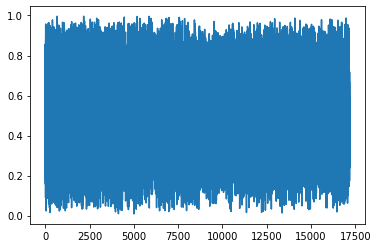

In [53]:
# выводим (визуализируем) результат (abrakadabra)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(y_test[:, 1])
plt.show()


In [65]:
# выводим (минимальное и максимальное значение прогноза (на тестовой выборке))
print('min.:', min(y_test[:, 1]))
print('max.:', max(y_test[:, 1]))


min.: 0.0085059906984314
max.: 0.9962795503882299


# P.S.

Анимация: gradient_descent.gif

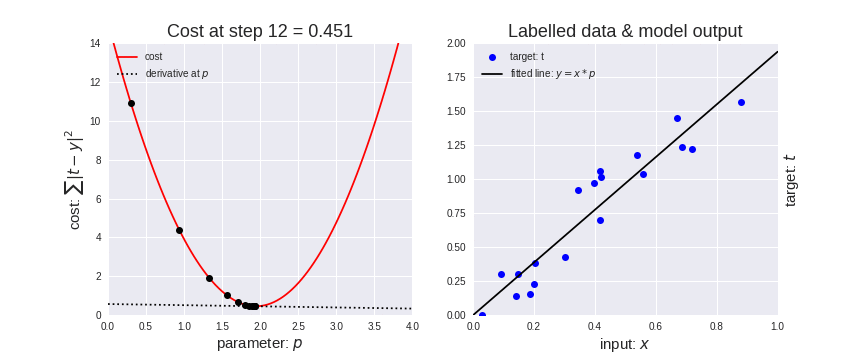

Спасибо!